# Basic Imports

In [1]:
import numpy as np  #load up the libraries and object defs. we need
import pandas as pd
from pandas import DataFrame, Series

# load up my visualization system, and call the object plt
import matplotlib.pyplot as plt

# tell ipython notebook to print visualizations inline
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


# Load Data

In [2]:
# A subset of data from the OECD Better Life Index (...and an incomplete one at that)
df = pd.read_excel('BetterLifeIndex.xlsx',skiprows=2) # Drop the non-data rows at the top

In [3]:
df.head(5) # Get a quick sample

,Country,Employment rate,Long-term unemployment rate,Student skills,Years in education,Air pollution,Water quality,Life expectancy,Life satisfaction,Feeling safe walking alone at night,Homicide rate
0,Australia,72,1.32,512,19.2,6,94,82.2,7.3,62.6,0.8
1,Austria,71,1.53,500,17.1,15,93,81.2,7.1,81.2,0.4
2,Belgium,62,4.26,509,18.8,19,83,80.7,6.9,69.6,1.1
3,Canada,72,0.89,522,16.3,12,90,81.5,7.4,81.7,1.5
4,Chile,62,1.67,436,17.1,18,71,78.8,6.5,50.2,3.8


In [4]:
# We can do math with these
df["Homicide rate"] + df["Feeling safe walking alone at night"] 

0     63.4
1     81.6
2     70.7
3     83.2
4     54.0
5     71.0
6     85.5
7     72.0
8     87.3
9     71.2
10    75.1
11    64.0
12    54.4
13    78.4
14    77.8
15    68.1
16    60.1
17    70.5
18    68.8
19    67.7
20    70.8
21    63.3
22    81.3
23    65.6
24    90.6
25    67.1
26    70.1
27    63.3
28    84.3
29    82.2
30    77.6
31    87.9
32    62.1
33    78.0
34    79.1
dtype: float64

In [5]:
# And create new columns
df["My Safety Score"] = (df["Homicide rate"] + df["Feeling safe walking alone at night"]) 
df.sample(5)

,Country,Employment rate,Long-term unemployment rate,Student skills,Years in education,Air pollution,Water quality,Life expectancy,Life satisfaction,Feeling safe walking alone at night,Homicide rate,My Safety Score
21,Mexico,60,0.06,417,14.4,12,68,74.6,6.2,39.9,23.4,63.3
6,Denmark,73,1.66,498,19.6,11,95,80.4,7.5,85.2,0.3,85.5
1,Austria,71,1.53,500,17.1,15,93,81.2,7.1,81.2,0.4,81.6
14,Ireland,61,6.98,516,17.8,8,82,81.1,6.8,77.0,0.8,77.8
23,New Zealand,74,0.78,509,18.0,9,92,81.4,7.4,64.4,1.2,65.6


^ _but is this actually a good composite score?_

In [6]:
# We might want to consider normalizing these so they're weighted more evenly
hr = df["Homicide rate"] 
df["Homicide rate (normalized)"] = (hr-hr.min())/(hr.max()-hr.min())
df.sample(5)

,Country,Employment rate,Long-term unemployment rate,Student skills,Years in education,Air pollution,Water quality,Life expectancy,Life satisfaction,Feeling safe walking alone at night,Homicide rate,My Safety Score,Homicide rate (normalized)
12,Hungary,62,3.78,487,17.2,16,76,75.7,5.3,53.2,1.2,54.4,0.043103
0,Australia,72,1.32,512,19.2,6,94,82.2,7.3,62.6,0.8,63.4,0.025862
20,Luxembourg,67,1.60,490,15.1,15,85,81.9,6.7,70.6,0.2,70.8,0.000000
15,Israel,68,0.63,474,15.9,26,65,82.1,7.1,66.3,1.8,68.1,0.068966
5,Czech Republic,69,2.72,500,17.4,17,88,78.3,6.6,70.1,0.9,71.0,0.030172


In [7]:
# A different way to perform computations on a whole column
df[['Homicide rate']].apply(lambda x: (x - x.mean()) / (x.max() - x.min())) # (here normalized distance from the mean)

,Homicide rate
0,-0.050739
1,-0.067980
2,-0.037808
3,-0.020567
4,0.078571
5,-0.046429
6,-0.072291
7,0.121675
8,-0.020567
9,-0.059360


In [8]:
# In case you want to index by country (remember that this creates a copy of the DataFrame)
new_df = df.set_index('Country')

In [9]:
new_df["Canada":"Canada"]

,Employment rate,Long-term unemployment rate,Student skills,Years in education,Air pollution,Water quality,Life expectancy,Life satisfaction,Feeling safe walking alone at night,Homicide rate,My Safety Score,Homicide rate (normalized)
Country,,,,,,,,,,,,
Canada,72,0.89,522,16.3,12,90,81.5,7.4,81.7,1.5,83.2,0.056034


# Question 1
What country is the safest?

*Remember, you should be able to clearly **present** the result to an audience (and have them understand how you got it.)*

In [10]:
fswh = new_df["Feeling safe walking alone at night"] 
new_df["FSWH (normalized)"] = (fswh-fswh.min())/(fswh.max()-fswh.min())
new_df.sample(5)

,Employment rate,Long-term unemployment rate,Student skills,Years in education,Air pollution,Water quality,Life expectancy,Life satisfaction,Feeling safe walking alone at night,Homicide rate,My Safety Score,Homicide rate (normalized),FSWH (normalized)
Country,,,,,,,,,,,,,
Latvia,66,4.67,494,17.8,12,76,74.1,5.9,61.6,6.1,67.7,0.254310,0.436620
Netherlands,73,2.98,519,17.9,17,94,81.4,7.3,80.5,0.8,81.3,0.025862,0.816901
Belgium,62,4.26,509,18.8,19,83,80.7,6.9,69.6,1.1,70.7,0.038793,0.597586
Czech Republic,69,2.72,500,17.4,17,88,78.3,6.6,70.1,0.9,71.0,0.030172,0.607646
Luxembourg,67,1.60,490,15.1,15,85,81.9,6.7,70.6,0.2,70.8,0.000000,0.617706


In [11]:
air_poll = new_df["Air pollution"] 
new_df["Air poll (normalized)"] = (air_poll-air_poll.min())/(air_poll.max()-air_poll.min())
new_df.sample(5)

,Employment rate,Long-term unemployment rate,Student skills,Years in education,Air pollution,Water quality,Life expectancy,Life satisfaction,Feeling safe walking alone at night,Homicide rate,My Safety Score,Homicide rate (normalized),FSWH (normalized),Air poll (normalized)
Country,,,,,,,,,,,,,,
Switzerland,80,1.71,518,17.4,17,97,82.9,7.6,87.4,0.5,87.9,0.012931,0.955734,0.478261
Belgium,62,4.26,509,18.8,19,83,80.7,6.9,69.6,1.1,70.7,0.038793,0.597586,0.565217
Chile,62,1.67,436,17.1,18,71,78.8,6.5,50.2,3.8,54.0,0.155172,0.207243,0.521739
Turkey,50,2.04,462,16.9,17,63,76.6,5.5,60.4,1.7,62.1,0.064655,0.412475,0.478261
Norway,75,0.41,496,18.0,6,97,81.8,7.6,89.6,1.0,90.6,0.034483,1.000000,0.000000


In [12]:
water_qual = new_df["Water quality"] 
new_df["Water qual (normalized)"] = (water_qual-water_qual.min())/(water_qual.max()-water_qual.min())
new_df.sample(5)

,Employment rate,Long-term unemployment rate,Student skills,Years in education,Air pollution,Water quality,Life expectancy,Life satisfaction,Feeling safe walking alone at night,Homicide rate,My Safety Score,Homicide rate (normalized),FSWH (normalized),Air poll (normalized),Water qual (normalized)
Country,,,,,,,,,,,,,,,
Japan,73,1.36,540,16.0,16,87,83.4,5.9,70.2,0.3,70.5,0.004310,0.609658,0.434783,0.705882
Czech Republic,69,2.72,500,17.4,17,88,78.3,6.6,70.1,0.9,71.0,0.030172,0.607646,0.478261,0.735294
Canada,72,0.89,522,16.3,12,90,81.5,7.4,81.7,1.5,83.2,0.056034,0.841046,0.260870,0.794118
Australia,72,1.32,512,19.2,6,94,82.2,7.3,62.6,0.8,63.4,0.025862,0.456740,0.000000,0.911765
Chile,62,1.67,436,17.1,18,71,78.8,6.5,50.2,3.8,54.0,0.155172,0.207243,0.521739,0.235294


In [13]:
hrn = new_df["Homicide rate (normalized)"]
fswh_n = new_df["FSWH (normalized)"]
air_poll_n = new_df["Air poll (normalized)"]
water_qual_n = new_df["Water qual (normalized)"]
new_df["Safety Score"] = -(hrn*5) + (fswh_n*1) - (air_poll_n*2) + (water_qual_n*2)

In [14]:
new_df = new_df.sort_values('Safety Score', ascending=False)
new_df.head(20)

,Employment rate,Long-term unemployment rate,Student skills,Years in education,Air pollution,Water quality,Life expectancy,Life satisfaction,Feeling safe walking alone at night,Homicide rate,My Safety Score,Homicide rate (normalized),FSWH (normalized),Air poll (normalized),Water qual (normalized),Safety Score
Country,,,,,,,,,,,,,,,,
Norway,75,0.41,496,18.0,6,97,81.8,7.6,89.6,1.0,90.6,0.034483,1.000000,0.000000,1.000000,2.827586
Iceland,82,0.67,484,19.6,7,97,82.1,7.5,78.1,0.3,78.4,0.004310,0.768612,0.043478,1.000000,2.660103
Sweden,75,1.33,482,19.1,7,95,82.0,7.3,76.8,0.8,77.6,0.025862,0.742455,0.043478,0.941176,2.408541
Finland,69,1.97,529,19.7,7,94,81.1,7.4,85.8,1.5,87.3,0.056034,0.923541,0.043478,0.911765,2.379942
Denmark,73,1.66,498,19.6,11,95,80.4,7.5,85.2,0.3,85.5,0.004310,0.911469,0.217391,0.941176,2.337487
Australia,72,1.32,512,19.2,6,94,82.2,7.3,62.6,0.8,63.4,0.025862,0.456740,0.000000,0.911765,2.150960
Switzerland,80,1.71,518,17.4,17,97,82.9,7.6,87.4,0.5,87.9,0.012931,0.955734,0.478261,1.000000,1.934557
Slovenia,64,5.27,499,18.3,14,91,80.4,5.7,83.9,0.4,84.3,0.008621,0.885312,0.347826,0.823529,1.793615
Austria,71,1.53,500,17.1,15,93,81.2,7.1,81.2,0.4,81.6,0.008621,0.830986,0.391304,0.882353,1.769980


The safest country is Norway.

# Question 2
On average what is the **life satisfaction** of the five countries with the **most years in education**?

In [15]:
q2 = df.sort_values('Years in education', ascending=False).head(5)

In [16]:
q2["Life satisfaction"].mean()

7.4

The average life satisfaction of the five countries with the most years of education is 7.4.

# Question 3
What is the distribution of life expectancy across OECD countries?
Are there other indicators with similar distributions? Do you think they are related?

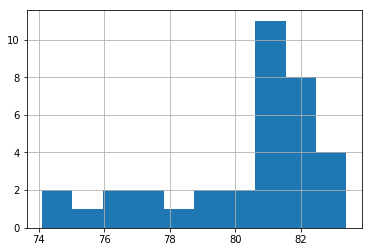

In [17]:
df["Life expectancy"].hist(bins=10)

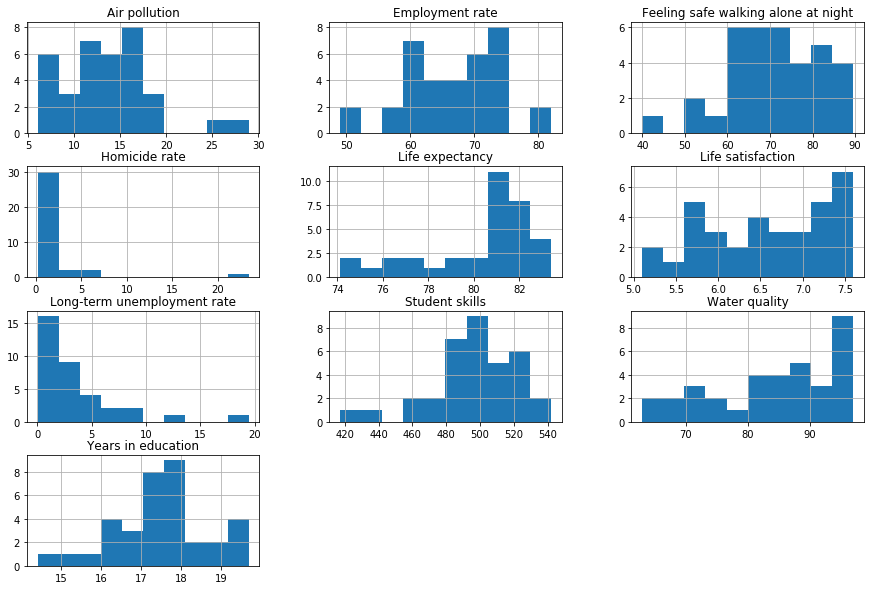

In [18]:
_ = df[["Employment rate","Long-term unemployment rate","Student skills","Years in education","Air pollution","Water quality","Life expectancy","Life satisfaction","Feeling safe walking alone at night","Homicide rate"]].hist(bins=10, figsize=(15,10))

## It appears as though Student Skills, Water Quality, and Years in Education all have somewhat similar distributions.

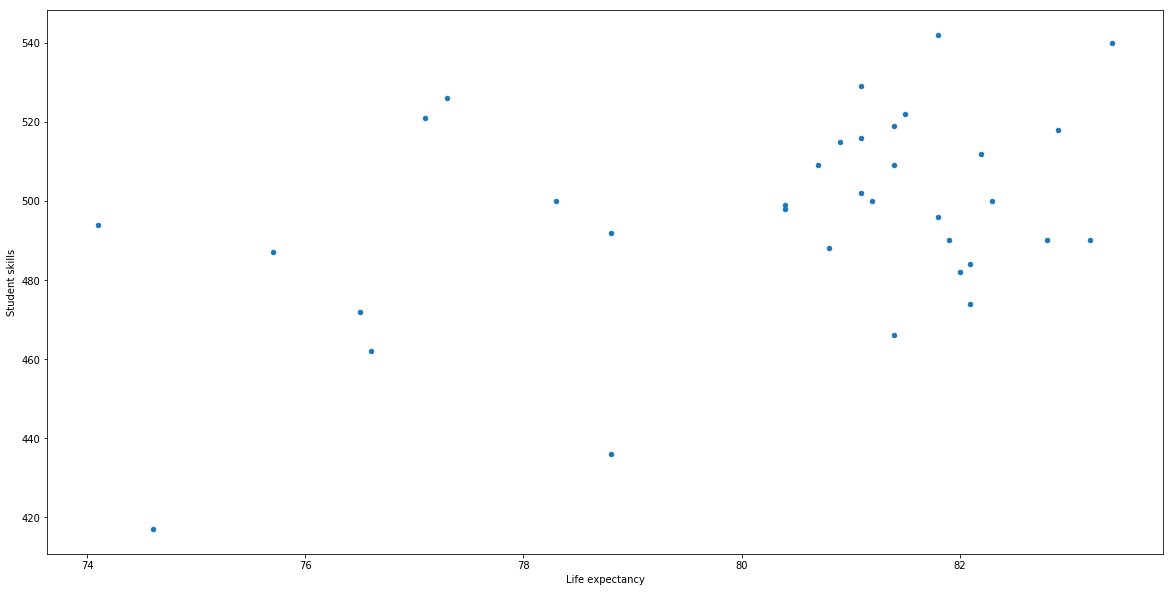

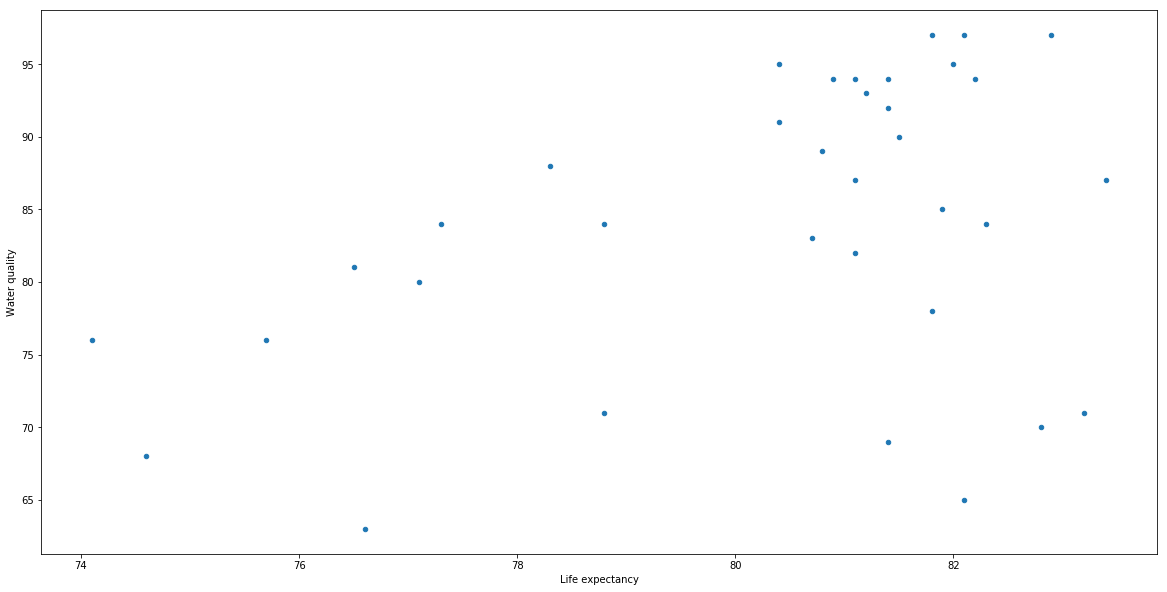

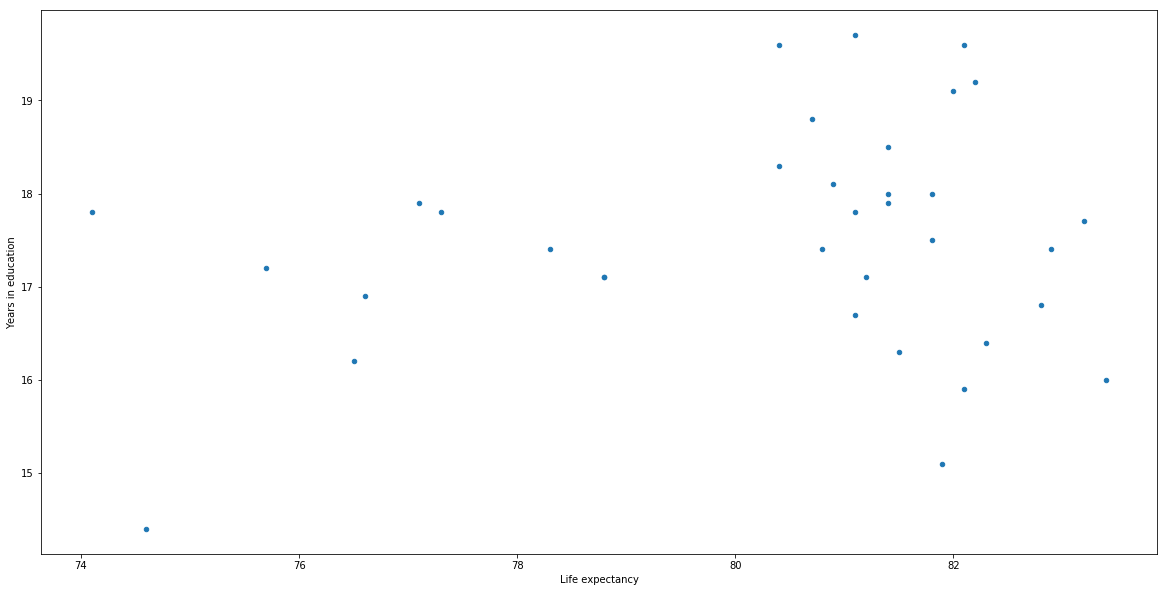

In [19]:
_ = df.plot(kind="scatter", x="Life expectancy", y="Student skills", figsize=(20,10))
_ = df.plot(kind="scatter", x="Life expectancy", y="Water quality", figsize=(20,10))
_ = df.plot(kind="scatter", x="Life expectancy", y="Years in education", figsize=(20,10))

## Upon further inspection, each of the scatter plots seems to imply a vaguely linear correlation; with Student Skills being the most visible linear.

# Question 4
Do Student Skills really correlate with Life Expectancy?

In [23]:
import seaborn as sns
sns.set(font_scale=1.75)
sns.set_style("white")

q4 = pd.read_excel('BetterLifeIndex2.xlsx',skiprows=2)

q4 = q4.sort_values('Life expectancy', ascending=False)

q4a = q4.head(10)
q4b = q4.tail(10)

a_countries = q4a.Country.unique()
b_countries = q4b.Country.unique()

In [26]:
top_countries = q4[q4['Country'].isin(a_countries)]
bot_countries = q4[q4['Country'].isin(b_countries)]

top_countries

,Country,Student skills,Life expectancy
38,Canada,523,88.0
58,New Zealand,506,88.0
69,United States,488,88.0
35,Australia,502,85.0
50,Israel,472,84.0
17,Japan,540,83.4
121,Japan,540,83.2
29,Spain,490,83.2
117,Iceland,484,83.0
31,Switzerland,518,82.9


In [27]:
bot_countries

,Country,Student skills,Life expectancy
17,Japan,540,83.4
121,Japan,540,83.2
87,Japan,538,82.7
155,Japan,529,82.7
18,Korea,542,81.8
122,Korea,542,81.3
88,Korea,537,81.1
156,Korea,541,81.1
26,Portugal,488,80.8
95,Portugal,488,80.8


(450, 550)

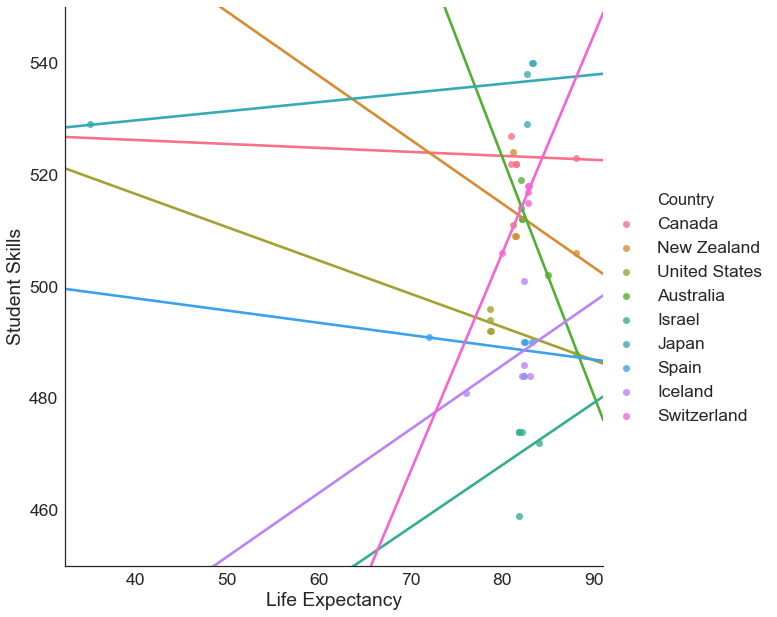

In [22]:
g = sns.lmplot(x='Life expectancy', y='Student skills', hue='Country', data=top_countries, size=9, ci=None)

g.set_axis_labels('Life Expectancy', 'Student Skills')

axes = g.axes
axes[0,0].set_ylim(450,550)

(450, 550)

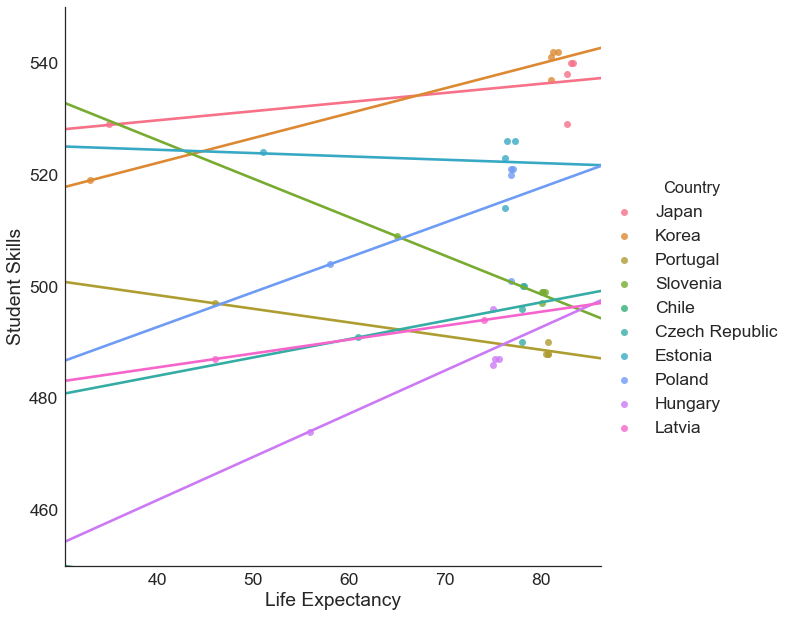

In [41]:
g = sns.lmplot(x='Life expectancy', y='Student skills', hue='Country', data=bot_countries, size=9, ci=None)

g.set_axis_labels('Life Expectancy', 'Student Skills')

axes = g.axes
axes[0,0].set_ylim(450,550)